Solve Landau-Zener problem, given by the Hamiltonian
$$
H(t) = z(t)\sigma_z + x\sigma_x
$$
where $z(t)$ is the driving parameters, and $x$ is a constant which defines the coupling between states.

The pulse is obtained by solving the differential equation which reads
$$
\frac{dz(t)}{dt} = \delta \operatorname{Re} \left(\frac{|\langle \psi_0 | \partial_\lambda \hat{H}| \psi_1\rangle|^{\beta}}{|E_1-E_0|^{\alpha}}\right)^{-1},
$$

where $\delta$ is defined as

$$
\delta = \frac{1}{t_f}\int_{z(t=0)}^{z(t=t_f)} \operatorname{Re} \left(\frac{|\langle \psi_0 | \partial_\lambda \hat{H}| \psi_1\rangle|^{\beta}}{|E_1-E_0|^{\alpha}}\right).
$$

Once the pulse shape is obtained, the time-dependent Schrödinger equation is solved, with the initial condition $\ket{\Psi(t=0)}=\ket{\psi_0(t=0)}$, is the ground state for the Hamiltonian at the initial time $H(t=0)$. Finally, the transfer fidelity is given by $\mathcal{F}=|\bra{\psi_0(t=t_f)}\Psi(t=t_f)\rangle|^2$. We define the maximum fidelity over the pulse time as $\max_{t_f} \mathcal{F}(t_f) = \mathcal{F}(t=\tilde{t}_f)\equiv\tilde{\mathcal{F}}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from HQUAD_lib.QUAD_utils import solve_LZ
from HQUAD_lib.parallel_utils import parameter_run
from HQUAD_lib.plotting_utils import plot_gradient_lines
from HQUAD_lib.physics_utils import fidelity_LZ

# Pulses shape

In [2]:
x = 1

n_alphas = 101
alphas = np.linspace(-4, 4, n_alphas)
alphas[0] = -np.inf
alphas[-1] = np.inf

betas = alphas

zs_sol = parameter_run(solve_LZ, [['alpha', 'beta']], [[alphas, betas]], x=x)

solve_LZ: [['alpha', 'beta']]:   0%|          | 0/101 [00:00<?, ?it/s]

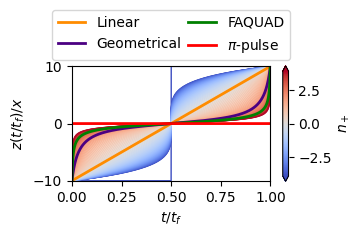

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(3.2, 1.5))
s = np.linspace(0, 1, len(zs_sol[0]))

ax, sm, cbar = plot_gradient_lines(s, zs_sol, alphas, betas, 
                                   x_label=r'$t / t_f$', y_label=r'$z(t/t_f) / x$',
                                   cbar_label=r'$n_+$',
                                   ax=ax, cbar_bool=True) 

ax.legend(frameon=True, bbox_to_anchor=(-0.1, 1.05, 1.2, 0.2), loc='lower left',
          mode='expand', borderaxespad=0, ncol=2);

# Fidelity and pulse times

In [4]:
def compute_fidelity_total(alpha, beta):
    pulse = solve_LZ(alpha, beta, x=x)

    fidelitites = parameter_run(fidelity_LZ, 'tf', tfs, pulse=pulse, x=x, z0=-10,
                                pbar_kwargs=dict(leave=False))
    return fidelitites

In [5]:
tfs = np.linspace(0.1, 10, 25)

n_alphas = 5  # Increase for higher resolution 
alphas = np.linspace(-5, 5, n_alphas)
betas = alphas

fidelities = np.zeros((n_alphas, n_alphas, len(tfs)))
pbar = tqdm(total=n_alphas ** 2, desc='Computing fidelitites')
for i in range(n_alphas):
    for j in range(n_alphas):
        fidelities[i, j] = compute_fidelity_total(alphas[i], betas[j])
        pbar.update()
pbar.close()

Computing fidelitites:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

fidelity_LZ: [['tf']]:   0%|          | 0/25 [00:00<?, ?it/s]

In [6]:
max_fidelity = np.max(fidelities, axis=2)
tf_tilde = tfs[np.argmax(fidelities, axis=2)]

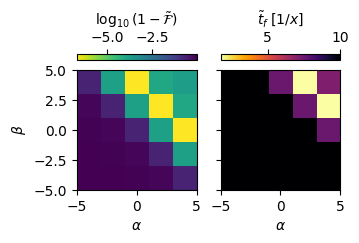

In [7]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(3.4, 2.6))

im = axs[0].imshow(np.log10(1 - max_fidelity.T), origin='lower', aspect='equal', interpolation='none',
                   extent=[min(alphas), max(alphas), min(betas), max(betas)], cmap='viridis_r')
cbar0 = plt.colorbar(im, ax=axs[0], label=r'$\log_{10}(1 - \tilde{\mathcal{F}})$', location='top')

im = axs[1].imshow(tf_tilde.T, origin='lower', aspect='equal', interpolation='none',
                  extent=[min(alphas), max(alphas), min(betas), max(betas)], cmap='inferno_r')
cbar1 = plt.colorbar(im, ax=axs[1], label=r'$\tilde{t}_f \; [1 / x]$', location='top')

axs[0].set_ylabel(r'$\beta$')
for ax in axs:
    ax.set_xlabel(r'$\alpha$')